In [ ]:
#give some introduction of how use some functions in openCV
import cv2
from google.colab.patches import cv2_imshow



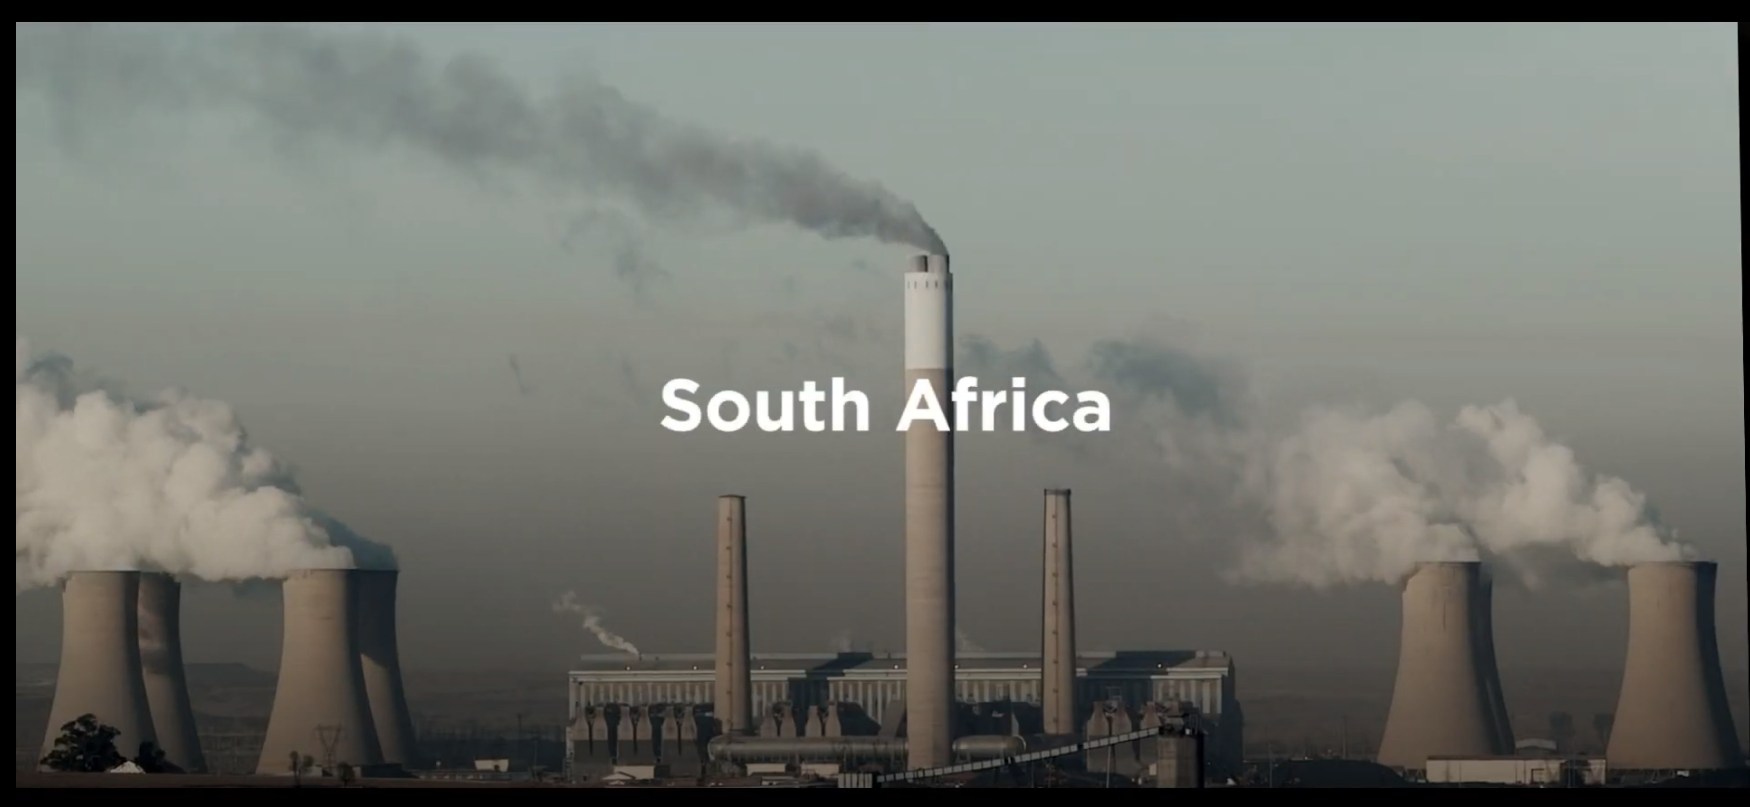

In [ ]:
#how read,show picture
image1 = cv2.imread('Screenshot_1.png')
cv2_imshow(image1)
#if use notebook or other editor
#cv2.imshow('Screenshot_2.png', image1)
key = cv2.waitKey(0)
if(key == ord('q')):
  exit()
cv2.destroyAllWindows()

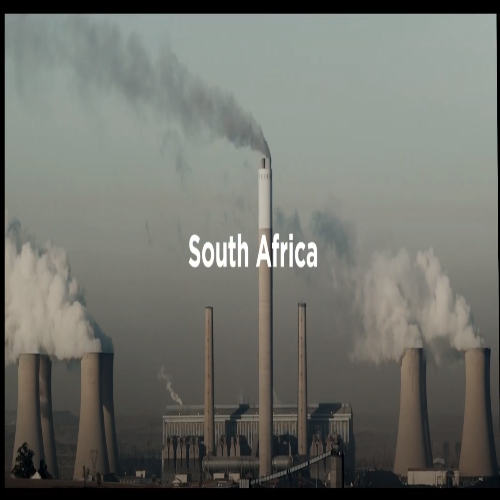

In [ ]:
#how resize image
image2 = cv2.resize(image1, (500, 500))
cv2_imshow(image2)

In [ ]:
#how use named window and resizewindow
import cv2
cv2.namedWindow('Window Name', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Window Name', 800, 600)

img = cv2.imread('Screenshot_1.png')

cv2.imshow('Window Name', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#how write image
image3 = cv2.imread('Screenshot_1.png')
cv2.imwrite('/content/image3.png',image3)


True

In [ ]:
#how record video
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    cv2.imshow('video',frame)
    key = cv2.waitKey(1)
    if(key == ord('q')):
        break
cap.release()
cv2.destroyAllWindows()

Failed to capture frame.


In [ ]:
#read video file frame
cap = cv2.VideoCapture('1.mp4')
while True:
    ret,frame = cap.read()
    cv2.imshow('video',frame)
    key = cv2.waitKey(1)
    if(key == ord('q')):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#how use VideoWriter record video
import cv2
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
# setting element
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = 30

# create VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    out.write(frame)
    cv2.imshow('Recording', frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Cannot open camera


In [ ]:
#write a callback function of mouse control


In [ ]:
#how use callback by setMouseCallback
import cv2
import numpy as np

img = np.zeros((500, 500, 3), np.uint8)
window_name = 'Mouse Callback Demo'
drawing = False  # 是否正在绘制
ix, iy = -1, -1  # 起始坐标
# 鼠标回调函数
def draw_rectangle(event, x, y, flags, param):
    global ix, iy, drawing, img
    temp_img = img.copy()
    if event == cv2.EVENT_LBUTTONDOWN:
        # 当按下左键时，记录起始点坐标并开始绘制
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        # 当鼠标移动且正在绘制时，显示临时矩形
        if drawing:
            cv2.rectangle(temp_img, (ix, iy), (x, y), (0, 255, 0), 2)
            cv2.imshow(window_name, temp_img)

    elif event == cv2.EVENT_LBUTTONUP:
        # 当释放左键时，完成绘制并在原图上绘制最终矩形
        drawing = False
        cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 2)

        # 在矩形中心显示文本
        center_x = (ix + x) // 2
        center_y = (iy + y) // 2
        cv2.putText(img, f'({ix},{iy})-({x},{y})', (center_x - 60, center_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        # 显示最终图像
        cv2.imshow(window_name, img)

# 创建窗口
cv2.namedWindow(window_name)
# 设置鼠标回调函数
cv2.setMouseCallback(window_name, draw_rectangle)

# 主循环
print("使用说明：按住左键拖动绘制矩形，按'r'清除图像，按'q'退出")
while True:
    cv2.imshow(window_name, img)
    key = cv2.waitKey(1) & 0xFF

    # 按'r'键清除图像
    if key == ord('r'):
        img = np.zeros((500, 500, 3), np.uint8)

    # 按'q'键退出
    elif key == ord('q'):
        break

cv2.destroyAllWindows()

In [ ]:
#create a trackbar by opencv
import cv2
import numpy as np

def nothing(x):
    pass

# 创建一个黑色图像和窗口
img = np.zeros((400, 600, 3), np.uint8)
cv2.namedWindow('RGB Color Adjustment')

# 创建RGB调节的trackbar
cv2.createTrackbar('R', 'RGB Color Adjustment', 0, 255, nothing)
cv2.createTrackbar('G', 'RGB Color Adjustment', 0, 255, nothing)
cv2.createTrackbar('B', 'RGB Color Adjustment', 0, 255, nothing)

# 创建一个开关用于切换处理模式
cv2.createTrackbar('Apply to Image/Color Block', 'RGB Color Adjustment', 0, 1, nothing)

# 尝试读取一张图片，如果不存在则使用纯色块
try:
    image = cv2.imread('image.jpg')
    # 调整图像大小以适应窗口
    image = cv2.resize(image, (600, 400))
    original_image = image.copy()
    has_image = True
    print("已加载图像，可以调整其RGB通道")
except:
    has_image = False
    print("未找到图像文件，将显示纯色块")

while True:
    # 获取当前trackbar的位置
    r = cv2.getTrackbarPos('R', 'RGB Color Adjustment')
    g = cv2.getTrackbarPos('G', 'RGB Color Adjustment')
    b = cv2.getTrackbarPos('B', 'RGB Color Adjustment')
    mode = cv2.getTrackbarPos('Apply to Image/Color Block', 'RGB Color Adjustment')

    # 显示说明文字
    if mode == 0:
        mode_text = "Mode: Color Block"
    else:
        mode_text = "Mode: Image Adjustment"

    # 根据模式应用不同效果
    if mode == 0 or not has_image:
        # 模式0：显示纯色块
        img[:] = [b, g, r]  # OpenCV使用BGR顺序

        # 显示RGB值
        text = f'R: {r}, G: {g}, B: {b}'
        cv2.putText(img, text, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255-b, 255-g, 255-r), 2)
        cv2.putText(img, mode_text, (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255-b, 255-g, 255-r), 2)

        cv2.imshow('RGB Color Adjustment', img)
    else:
        # 模式1：调整图像的RGB通道
        # 分离通道
        b_channel, g_channel, r_channel = cv2.split(original_image)

        # 应用trackbar值
        b_channel = cv2.add(b_channel, b - 128)  # 调整蓝色通道
        g_channel = cv2.add(g_channel, g - 128)  # 调整绿色通道
        r_channel = cv2.add(r_channel, r - 128)  # 调整红色通道

        # 合并通道
        adjusted_image = cv2.merge((b_channel, g_channel, r_channel))

        # 显示RGB调整值
        text = f'R: {r-128:+d}, G: {g-128:+d}, B: {b-128:+d}'
        cv2.putText(adjusted_image, text, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
        cv2.putText(adjusted_image, mode_text, (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

        cv2.imshow('RGB Color Adjustment', adjusted_image)

    # 按ESC键退出
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

In [ ]:
# show how different of different of color space
import cv2
import numpy as np

def empty(a):
    pass

img = cv2.imread('1.png')  # 替换为你的图片路径
if img is None:
    print("错误：无法加载图像")
    exit()

cv2.namedWindow('Color Space Converter')
cv2.resizeWindow('Color Space Converter', 640, 240)

# 创建色彩空间选择滑动条
# 0=原始BGR, 1=RGB, 2=HSV, 3=LAB, 4=GRAY, 5=YUV
cv2.createTrackbar('Color Space', 'Color Space Converter', 0, 5, empty)

while True:
    space = cv2.getTrackbarPos('Color Space', 'Color Space Converter')

    # 转换色彩空间
    if space == 0:  # 原始BGR
        result = img.copy()
        color_space = "BGR (原始)"
    elif space == 1:  # RGB
        result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        color_space = "RGB"
    elif space == 2:  # HSV
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        # 为了显示，我们需要将HSV转回BGR
        result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        color_space = "HSV→BGR"
    elif space == 3:  # LAB
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        # 为了显示，我们需要将LAB转回BGR
        result = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        color_space = "LAB→BGR"
    elif space == 4:  # 灰度
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # 为了显示，我们需要将灰度扩展到3通道
        result = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        color_space = "灰度"
    elif space == 5:  # YUV
        yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        # 为了显示，我们需要将YUV转回BGR
        result = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
        color_space = "YUV→BGR"

    text_img = result.copy()
    cv2.putText(text_img, color_space, (20, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
    cv2.imshow('Original (BGR)', img)
    cv2.imshow('Converted', text_img)

    # 按ESC键退出
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()